# Exercícios 

Você recebeu o arquivo **Swarm_Behaviour.csv**. Ele contém informações sobre locomoção de grupos de animais. Existe um atributo chamado **'Swarm_Behaviour'** que classifica o movimento como agrupado (1) e não agrupado (0).


1. É possível criar um bom modelo para prevê-lo? Escolha um modelo de ML e teste suas métricas de performance utilizando o número máximo de atributos.

2. Utilize o PCA e verifique o comportamento da variância explicada como função do número de componentes principais (faça um gráfico). 

Para cada experimento abaixo, considere 10 o número máximo de componentes. 

3. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do PCA. 

4. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do Kernel-PCA. 

5. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do LDA.

6. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do TSNE. 

7. Apresente graficamente a comparação entre todas as medições de performance observadas anteriormente em um único gráfico (plt.bar).

8. Qual foi a melhor estratégia para esse dado? 







In [5]:
import pandas as pd 
import seaborn as sns 

In [6]:
import gdown
import os

file = 'https://drive.google.com/file/d/1Sg3ZMYMw0zlQJbKWr66x6aBPmbDUYJqJ/view?usp=sharing'
output = 'Swarm_Behaviour.csv.zip'

if not os.path.exists(output):
    print(f"File {output} not found. Downloading...")
    fileId = file.split('/')[5]
    url = 'https://drive.google.com/uc?id=' + fileId
    gdown.download(url, output, quiet=False)
else:
    print(f"File {output} already exists. No download needed.")



File Swarm_Behaviour.csv.zip already exists. No download needed.


In [7]:
df=pd.read_csv('Swarm_Behaviour.csv.zip')

In [8]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [9]:
df['Swarm_Behaviour'].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

# Amostra do dado

In [10]:
df.sample(frac=0.1)


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
9467,-1223.87,-334.48,10.00,1.18,0.00,-0.01,0.00,0.00,0.31,0.07,...,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,2,0,0.0
22083,-872.65,-200.75,-6.69,-2.39,-0.56,0.01,0.42,-1.79,0.22,-0.23,...,-1.10,-0.56,0.04,0.00,0.00,-0.30,-0.12,28,0,1.0
21730,-169.13,-159.96,-8.62,0.94,-0.56,0.01,0.00,0.00,0.14,-0.29,...,0.23,-0.56,0.00,1.83,0.16,-0.05,-0.32,70,2,1.0
970,-1407.38,70.72,-14.37,-5.81,0.00,0.00,0.00,0.00,0.00,0.00,...,-16.20,0.00,0.00,0.00,0.00,0.00,0.00,40,0,0.0
22339,63.82,818.54,-2.85,12.43,-0.16,1.03,0.00,0.00,0.00,0.00,...,9.35,-0.21,1.02,0.00,0.00,0.00,0.00,17,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,1337.27,-724.40,-0.33,7.59,0.22,0.97,0.00,0.00,0.48,0.88,...,9.88,-0.06,1.00,0.00,0.00,-0.06,1.00,1,0,1.0
20809,-453.76,-657.62,-0.72,3.04,0.00,0.00,0.27,0.34,0.49,-0.87,...,0.35,0.00,0.00,0.42,0.12,-0.90,-0.44,112,27,0.0
20853,806.37,452.58,6.52,-7.54,0.00,0.00,0.00,0.00,0.00,0.00,...,0.30,0.00,0.00,0.00,0.00,0.00,0.00,36,0,0.0
9094,-710.37,504.54,3.35,13.88,0.00,1.00,0.00,0.00,0.00,0.00,...,13.66,0.00,1.00,-4.92,3.13,0.00,0.00,1,0,0.0


In [11]:
df.sample(frac=0.2)['Swarm_Behaviour'].value_counts()

0.0    3085
1.0    1577
Name: Swarm_Behaviour, dtype: int64

In [12]:
df=df.sample(frac=0.2).reset_index(drop=True)

In [13]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,-1021.25,396.43,-2.48,-4.97,0.00,0.00,0.00,0.00,0.00,0.00,...,-5.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0
1,1284.32,474.05,1.22,7.43,0.06,1.00,0.00,0.00,0.19,0.98,...,7.19,-0.06,1.00,0.00,0.00,-0.06,1.00,1,0,1.0
2,1067.02,801.89,-8.29,-3.00,-0.53,-0.17,0.00,0.00,-0.29,-0.14,...,-0.80,-0.56,-0.05,0.00,0.00,-0.31,-0.06,12,0,1.0
3,456.38,908.67,-3.66,-4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,-7.25,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0.0
4,793.05,-575.76,-18.59,-0.01,-0.50,0.87,-2.22,-2.56,-1.81,-1.98,...,-0.68,-0.52,0.86,-1.39,-1.21,0.96,2.50,49,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,-667.96,388.11,6.68,-9.87,0.00,0.00,0.00,0.00,0.00,0.00,...,0.97,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
4658,-150.96,-431.62,-2.02,9.32,-0.08,-1.00,9.27,37.68,-0.45,-2.64,...,-7.40,-0.59,-0.81,0.00,0.00,0.05,-2.68,26,0,0.0
4659,347.92,760.51,5.31,6.70,0.00,1.00,0.00,0.00,0.00,0.00,...,9.49,0.00,1.00,0.00,0.00,0.00,0.00,2,0,0.0
4660,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.00,0.00,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0


# Equilibrar o dado

In [14]:
df1=df[df['Swarm_Behaviour']==1].reset_index(drop=True)
df0=df[df['Swarm_Behaviour']==0][0:len(df1)].reset_index(drop=True)
df_equi=pd.concat([df0,df1],axis=0,ignore_index=True)

In [15]:
df_equi

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,-1021.25,396.43,-2.48,-4.97,0.00,0.00,0.00,0.00,0.00,0.00,...,-5.00,0.00,0.00,0.0,0.00,0.00,0.00,0,0,0.0
1,456.38,908.67,-3.66,-4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,-7.25,0.00,0.00,0.0,0.00,0.00,0.00,1,0,0.0
2,801.22,780.83,3.96,-8.55,0.00,0.00,0.00,0.00,0.01,-0.10,...,-3.30,0.00,-0.01,0.0,0.00,-0.24,-0.21,3,1,0.0
3,-1309.79,-338.56,10.40,-12.04,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.81,0.00,0.00,0.0,0.00,0.00,0.00,7,0,0.0
4,-1063.77,255.90,0.72,12.94,0.00,1.00,0.00,0.00,0.00,0.00,...,5.77,0.00,0.00,0.0,0.00,0.00,0.00,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,-490.18,-653.81,0.37,3.19,0.00,0.00,-0.07,0.43,0.44,-0.90,...,-2.62,0.00,0.00,0.4,0.17,-0.58,-0.81,112,50,1.0
3146,1112.64,61.12,-0.30,8.21,-0.04,1.00,0.00,0.00,-0.04,1.00,...,7.14,0.00,1.00,0.0,0.00,0.00,1.00,11,2,1.0
3147,-1230.96,885.39,-0.97,7.38,0.07,1.00,0.00,0.00,-0.28,0.96,...,7.22,0.00,0.00,0.0,0.00,0.00,0.00,0,0,1.0
3148,-1.19,750.40,-0.36,7.64,-0.04,1.04,0.00,0.00,0.00,0.00,...,11.25,-0.17,1.03,0.0,0.00,0.00,0.00,15,0,1.0


In [16]:
df_equi['Swarm_Behaviour'].value_counts()

0.0    1575
1.0    1575
Name: Swarm_Behaviour, dtype: int64

# Teste com o t-sne

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [18]:
tsne = TSNE(n_components=2,n_iter=1000)

In [19]:
X=df_equi.drop('Swarm_Behaviour',axis=1)
y=df_equi["Swarm_Behaviour"]

In [20]:
X_tsne = tsne.fit_transform(X)

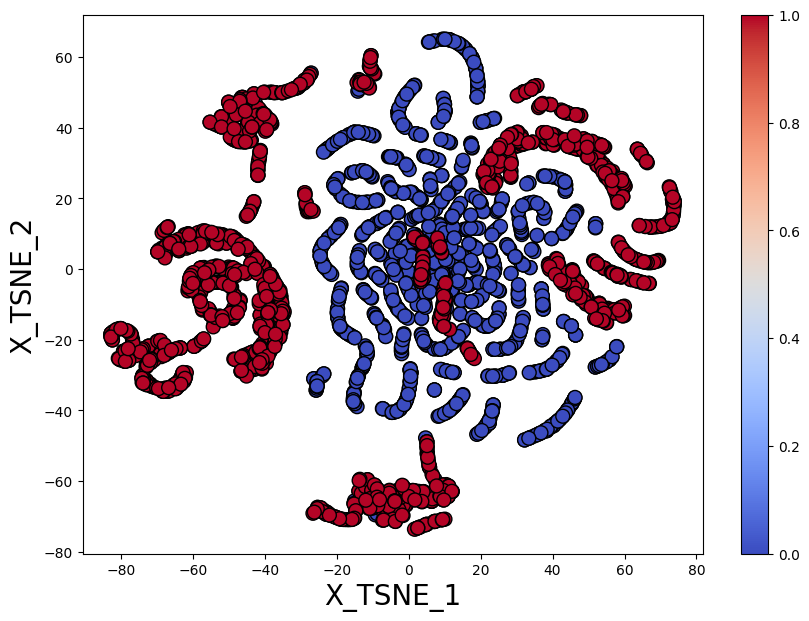

In [21]:
plt.figure(figsize=(10,7))
plt.xlabel('X_TSNE_1',fontsize=20)
plt.ylabel('X_TSNE_2',fontsize=20)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=100,edgecolors='black',cmap='coolwarm')
plt.colorbar()

# Questão 1. 
É possível criar um bom modelo para prevê-lo? Escolha um modelo de ML e teste suas métricas de performance utilizando o número máximo de atributos.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

from sklearn.neural_network import MLPClassifier


In [23]:
features = df_equi.columns[0:-1]
target = df_equi.columns[-1]

## Dados Originais equilibrados

In [24]:
# Precissão com dados originais
X=df_equi[features]# dimensoes
y=df_equi[target]# alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_dados=accuracy_score(y_test,y_pred)

0.8692893401015228 0.8700763398521499


## Dados Escalonado

In [25]:
from sklearn.preprocessing import StandardScaler

X=df_equi[features]# dimensoes
y=df_equi[target]# alvo

# Escalonamento
scaler=StandardScaler()
X_scalonado=scaler.fit_transform(X)

In [26]:
X_scalonado.shape

(3150, 2400)

In [27]:
# Precissão com dados originais
X=X_scalonado# dimensoes
y=df_equi[target]# alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_escalonado=accuracy_score(y_test,y_pred)

0.9022842639593909 0.9022658496858448


# Questão 2. 
Utilize o PCA e verifique o comportamento da variância explicada como função do número de componentes principais (faça um gráfico). 

## PCA

In [28]:
from sklearn.decomposition import PCA

# PCA
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X_scalonado)

# print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

Text(0.5, 0, 'COMPONENTE')

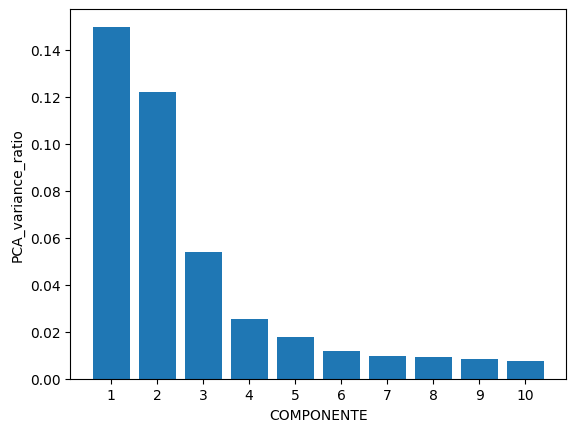

In [ ]:
import numpy as np

plt.bar(np.arange(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,)
plt.xticks(np.arange(1,len(pca.explained_variance_ratio_)+1),np.arange(1,len(pca.explained_variance_ratio_)+1))
plt.ylabel('PCA_variance_ratio')
plt.xlabel('COMPONENTE')

### Para cada experimento abaixo, considere 10 o número máximo de componentes. 

# Questão 3.

Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do PCA. 

In [ ]:
columns=['PCA'+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]
df_pca=pd.DataFrame(data=X_pca,columns=columns)

In [ ]:
# Precissão com pca

# dropar coluna TARGET
X=df_pca # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_pca=accuracy_score(y_test,y_pred)

0.9151061173533084 0.9150656105047075


# Questão 4
Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do Kernel-PCA. 

In [ ]:
from sklearn.decomposition import KernelPCA

ke=KernelPCA(n_components=10,kernel='linear')

X_ke=ke.fit_transform(X_scalonado)

In [ ]:
# Precissão com kernel pca

# dropar coluna TARGET
X=X_ke # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_kernel_pca=accuracy_score(y_test,y_pred)

0.9063670411985019 0.9063226588154232


# Questão 5 
Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do LDA.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=None)

X=X_scalonado;
y = df_equi[target];

X_lda=lda.fit_transform(X,y)
y_lda=y

In [ ]:
# Precissão com kernel pca

# dropar coluna TARGET
X=X_lda # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_lda=accuracy_score(y_test,y_pred)

0.9937578027465668 0.9937574713602547


# Questão 6
Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do TSNE. 

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=1000)

X = X_scalonado
y = df_equi[target]

X_tsne = tsne.fit_transform(X)

In [ ]:
# Precissão com kernel pca

# dropar coluna TARGET
X=X_tsne # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_tsne=accuracy_score(y_test,y_pred)

0.867665418227216 0.867665418227216


# Questão 7
Apresente graficamente a comparação entre todas as medições de performance observadas anteriormente em um único gráfico (plt.bar).

(0.0, 1.2)

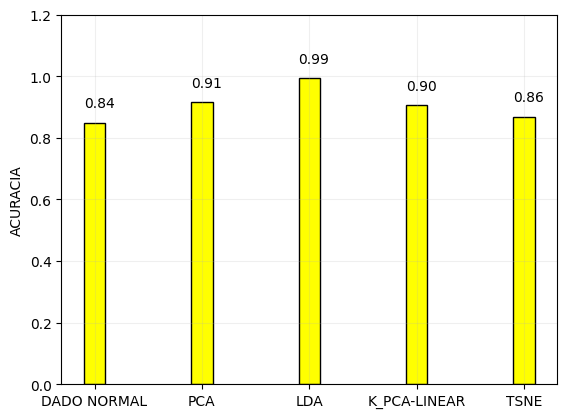

In [ ]:
valores=[accuracy_dados,accuracy_pca,accuracy_lda,accuracy_kernel_pca,accuracy_tsne]
nome_modelo=['DADO NORMAL','PCA','LDA','K_PCA-LINEAR','TSNE']

plt.bar(nome_modelo,valores,edgecolor='black',color='yellow',width=0.2)
plt.grid(alpha=0.2)
plt.ylabel('ACURACIA')

plt.annotate(str(valores[0])[0:4],(0-0.1,valores[0]+0.05))
plt.annotate(str(valores[1])[0:4],(1-0.1,valores[1]+0.05))
plt.annotate(str(valores[2])[0:4],(2-0.1,valores[2]+0.05))
plt.annotate(str(valores[3])[0:4],(3-0.1,valores[3]+0.05))
plt.annotate(str(valores[4])[0:4],(4-0.1,valores[4]+0.05))

plt.ylim(0,1.2)

# Questão 8
Qual foi a melhor estratégia para esse dado? 

Resposta = LDA